<a href="https://colab.research.google.com/github/carolflyjs/cs230/blob/master/Glove_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run "/content/drive/My Drive/Colab Notebooks/Data_Processing_v2.ipynb"

     |████████████████████████████████| 1.9MB 4.8MB/s 


Using TensorFlow backend.


In [2]:
glove_file = keras.utils.get_file("glove.6B.zip", "http://nlp.stanford.edu/data/glove.6B.zip", extract=True)

862183424/862182613 [==============================] - 386s 0us/step


In [0]:
def load_glove(glove_dir, glove_file_name):
    embeddings_index = {}
    f = open(os.path.join(glove_dir, glove_file_name))
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except:
            pass
    f.close()
    return embeddings_index

In [0]:
embeddings_index = load_glove("/root/.keras/datasets/", "glove.6B.100d.txt")
embedding_dim = 100

In [0]:
def load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    not_found = []
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
        else:
            not_found.append((word, i))
    return embedding_matrix, not_found

In [0]:
def build_glove_model(max_value, embedding_matrix, embedding_dim = 10, LSTM_dim = 128): 
    X_input = Input(shape=(max_value * 2,), dtype="int32")
    X = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix])(X_input)
    X = LSTM(LSTM_dim, kernel_regularizer=keras.regularizers.l2(0.01))(X)
    # X = keras.layers.Flatten("channels_last")(X)
    X = Dense(4, activation="softmax")(X)

    model = Model(inputs=[X_input], outputs=X)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

    return model

In [0]:
embedding_matrix, not_found = load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, tokenizer.word_index)

In [8]:
model = build_glove_model(max_value, embedding_matrix, embedding_dim)












Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 132)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 132, 100)          277500    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 395,264
Trainable params: 395,264
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights("/content/drive/My Drive/cs230/glove_model.h5")


In [17]:
history = model.fit(X_train_tokenized, Y_train, validation_split=0.1, epochs=1, batch_size=32, class_weight=class_weight) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Train on 20599 samples, validate on 2289 samples
Epoch 1/1
20599/20599 [==============================] - 137s 7ms/step - loss: 3.0641 - acc: 0.2982 - val_loss: 2.7471 - val_acc: 0.3517


In [18]:
history_1 = model.fit(X_train_tokenized, Y_train, validation_split=0.1, epochs=10, batch_size=32, class_weight=class_weight) 

Train on 20599 samples, validate on 2289 samples
Epoch 1/10
20599/20599 [==============================] - 134s 7ms/step - loss: 2.5562 - acc: 0.3683 - val_loss: 2.5859 - val_acc: 0.3434
Epoch 2/10
20599/20599 [==============================] - 136s 7ms/step - loss: 2.3954 - acc: 0.3923 - val_loss: 2.5399 - val_acc: 0.3906
Epoch 3/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.2775 - acc: 0.4119 - val_loss: 2.5437 - val_acc: 0.4045
Epoch 4/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.1995 - acc: 0.4274 - val_loss: 2.4794 - val_acc: 0.3989
Epoch 5/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.1392 - acc: 0.4484 - val_loss: 2.4996 - val_acc: 0.3779
Epoch 6/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.0852 - acc: 0.4577 - val_loss: 2.5254 - val_acc: 0.3976
Epoch 7/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.0306 - acc: 0.4715 - val_loss: 2.4784 - v

In [19]:
history_2 = model.fit(X_train_tokenized, Y_train, validation_split=0.1, epochs=10, batch_size=32, class_weight=class_weight) 

Train on 20599 samples, validate on 2289 samples
Epoch 1/10
20599/20599 [==============================] - 135s 7ms/step - loss: 1.9037 - acc: 0.5035 - val_loss: 2.6524 - val_acc: 0.3954
Epoch 2/10
20599/20599 [==============================] - 135s 7ms/step - loss: 1.8696 - acc: 0.5138 - val_loss: 2.6568 - val_acc: 0.4683
Epoch 3/10
20599/20599 [==============================] - 135s 7ms/step - loss: 1.9535 - acc: 0.5108 - val_loss: 2.5764 - val_acc: 0.4478
Epoch 4/10
20599/20599 [==============================] - 136s 7ms/step - loss: 1.8550 - acc: 0.5252 - val_loss: 2.7655 - val_acc: 0.4683
Epoch 5/10
20599/20599 [==============================] - 136s 7ms/step - loss: 1.9095 - acc: 0.5361 - val_loss: 3.1162 - val_acc: 0.4251
Epoch 6/10
20599/20599 [==============================] - 135s 7ms/step - loss: 2.0096 - acc: 0.5561 - val_loss: 2.5939 - val_acc: 0.5046
Epoch 7/10
20599/20599 [==============================] - 135s 7ms/step - loss: 1.8606 - acc: 0.5790 - val_loss: 2.3441 - v

In [20]:
history_2 = model.fit(X_train_tokenized, Y_train, validation_split=0.1, epochs=50, batch_size=32, class_weight=class_weight) 

Train on 20599 samples, validate on 2289 samples
Epoch 1/50
20599/20599 [==============================] - 136s 7ms/step - loss: 1.1681 - acc: 0.7125 - val_loss: 1.8951 - val_acc: 0.6225
Epoch 2/50
20599/20599 [==============================] - 135s 7ms/step - loss: 1.1917 - acc: 0.7192 - val_loss: 1.8269 - val_acc: 0.6488
Epoch 3/50
20599/20599 [==============================] - 135s 7ms/step - loss: 1.0857 - acc: 0.7489 - val_loss: 1.7736 - val_acc: 0.6204
Epoch 4/50
20599/20599 [==============================] - 135s 7ms/step - loss: 1.0021 - acc: 0.7780 - val_loss: 1.7889 - val_acc: 0.6855
Epoch 5/50
20599/20599 [==============================] - 136s 7ms/step - loss: 1.6965 - acc: 0.6203 - val_loss: 2.6278 - val_acc: 0.4723
Epoch 6/50
20599/20599 [==============================] - 135s 7ms/step - loss: 1.8154 - acc: 0.5910 - val_loss: 3.4483 - val_acc: 0.4072
Epoch 7/50
20599/20599 [==============================] - 136s 7ms/step - loss: 1.6955 - acc: 0.6244 - val_loss: 1.9360 - v

In [10]:
history_3 = model.fit(X_train_tokenized, Y_train, validation_split=0.1, epochs=50, batch_size=32, class_weight=class_weight) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20599 samples, validate on 2289 samples
Epoch 1/50
20599/20599 [==============================] - 134s 6ms/step - loss: 1.6885 - acc: 0.7605 - val_loss: 1.2170 - val_acc: 0.8060
Epoch 2/50
20599/20599 [==============================] - 134s 6ms/step - loss: 1.0918 - acc: 0.8212 - val_loss: 1.1358 - val_acc: 0.8375
Epoch 3/50
20599/20599 [==============================] - 134s 6ms/step - loss: 0.8783 - acc: 0.8601 - val_loss: 1.0473 - val_acc: 0.8235
Epoch 4/50
20599/20599 [==============================] - 135s 7ms/step - loss: 0.7407 - acc: 0.8827 - val_loss: 0.9998 - val_acc: 0.8384
Epoch 5/50
20599/20599 [==============================] - 134s 7ms/step - loss: 0.6624 - acc: 0.8987 - val_loss: 1.0322 - val_acc: 0.8462
Epoch 6/50
20599/20599 [==============================] - 132s 6ms/step - loss: 0.5871 - acc: 0.9142 - val_loss: 0.9589 - val_acc: 0.8619
Epoch 7/50
20599/20599 [===

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/cs230/glove_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/cs230/glove_model.h5")
print("Saved model to disk")

Saved model to disk


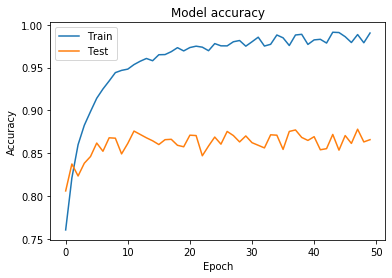

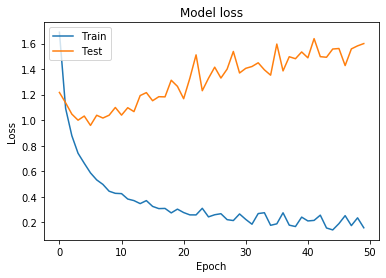

In [12]:
# Plot training & validation accuracy values
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()